# Data Preparation
## Part 1 of the Workshop "Text Classification - From Zero to Hero", by Dr. Omri Allouche, Gong.io, Bar Ilan University
In this notebook, we prepare the data for analysis, and save it as CSV files.  
We will create different files for train, validation and test named `train.csv`, `val.csv` and `test.csv`.  
The Fast-BERT package gets as an input a folder containing these 3 files, and a file with the possible labels.

In the notebook [Bag of Words and Tf-Idf](bow_tfidf.ipynb) we perform basic Exploratory Data Analysis on the dataset.

For this exercise, we will use only some of the groups - `rec.sport.baseball`, `rec.sport.hockey`, `talk.politics.guns`, `talk.politics.mideast`.  
We will also get only the post text, and remove its header information.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_20newsgroups

types_to_remove = ('headers', 'footers', 'quotes')
newsgroups_categories = ['rec.sport.baseball', 'rec.sport.hockey', 'talk.politics.guns', 'talk.politics.mideast']

newsgroups_data = fetch_20newsgroups(subset='all',
                                      categories=newsgroups_categories,
                                      remove=types_to_remove)

In [3]:
import pandas as pd
df = pd.DataFrame({'original_text': newsgroups_data.data, 
                   'target': newsgroups_data.target,
                  'label': [newsgroups_data.target_names[x] for x in newsgroups_data.target]})

In [4]:
df.shape

(3843, 3)

Next we'll perform basis preprocessing of the text.  

In [5]:
def preprocess_text(txt):
    txt = txt.replace('\n', ' ').replace('...', '.').replace('\r', ' ').replace('\t', ' ')
    # txt = txt.replace('?', ' ?').replace('.', ' .').replace(',', ' ,')
    txt = txt.lower().strip()
    txt = txt.split(' ')
    txt = " ".join([w for w in txt if w!=''])
    return txt

In [6]:
df['text'] = df['original_text'].apply(preprocess_text)

In [7]:
# Let's filter out documents that are empty after our preprocessing
df['num_chars'] = df['text'].apply(len)
df = df[ df['num_chars']>0 ]

In [8]:
print(df.iloc[1]['original_text'])
print(df.iloc[1]['text'])

...

If we are indeed talking about CS, then this is not quite accurate. CS is
"just" tear gas--albeit the worst kind. It isn't a nausea gas, and doesn't
have direct CNS effects. However, it's quite bad--much worse than CN gas. I
was briefly exposed to it once (during an engagement in Berkeley circa 1968
8^) and it's not the kind of thing you forget. It seems to be
moisture-activated--it not only made my eyes sting and water, but attacked
my breathing passages and lungs. Breathing was painful, and my entire face
felt as if it was on fire. These effects persisted for hours after
exposure, and I was coughing for days afterwards.  If I was exposed to a
dense concentration of this stuff in a closed space for several hours, I
doubt whether I could find the exit. Indeed, I can't imagine living through
it.


. if we are indeed talking about cs, then this is not quite accurate. cs is "just" tear gas--albeit the worst kind. it isn't a nausea gas, and doesn't have direct cns effects. however, it

(0, 500)

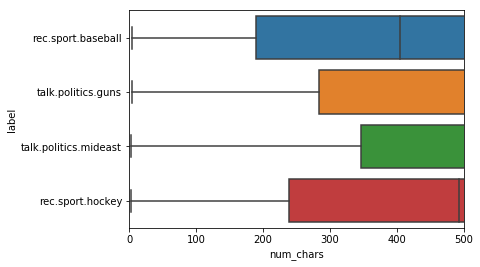

In [9]:
sns.boxplot(data=df, y='label', x='num_chars')
plt.xlim(0,500)

In [10]:
df = df[ df['num_chars']>=200 ]
df.shape

(3012, 5)

In [11]:
df = df[ df['num_chars']<=400 ]
df.shape

(738, 5)

In [12]:
df['label'].value_counts()

rec.sport.baseball       223
rec.sport.hockey         207
talk.politics.guns       177
talk.politics.mideast    131
Name: label, dtype: int64

In [13]:
g = df.groupby('label')
df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

In [14]:
df['label'].value_counts()

talk.politics.mideast    131
rec.sport.baseball       131
talk.politics.guns       131
rec.sport.hockey         131
Name: label, dtype: int64

In [15]:
import os
os.makedirs('data/', exist_ok=True)

In [16]:
# Save the entire dataset to a single file
df.to_csv('data/20newsgroups.csv', index=False)
df = df.drop(['original_text', 'target'], axis=1)

In [17]:
# Save files for train, test and validation
# df = df.reset_index()
df_train = df.sample(frac=0.7, random_state=0)
df_test = df.drop(df_train.index)
df_val = df_test.sample(frac=0.5, random_state=0)
df_test = df_test.drop(df_val.index)

In [18]:
df_test.head()

label  \
label                                       
rec.sport.baseball 0   rec.sport.baseball   
                   9   rec.sport.baseball   
                   23  rec.sport.baseball   
                   28  rec.sport.baseball   
                   31  rec.sport.baseball   

                                                                    text  \
label                                                                      
rec.sport.baseball 0   i wish i hadn't sold my copy of jewish basebal...   
                   9   the best one i saw last year was willie mcgee ...   
                   23  the answer is - they're stupid. seriously, i t...   
                   28  newsgroups: rec.sport.baseball harry talks abo...   
                   31  i would like to make everyone aware that in wi...   

                       num_chars  
label                             
rec.sport.baseball 0         299  
                   9         210  
                   23        354  
                   28        297  
                   31        224

In [19]:
df_train.to_csv('data/train.csv', index=False)
df_val.to_csv('data/val.csv', index=False)
df_test.to_csv('data/test.csv', index=False)

In [20]:
# Save a labels.csv file, needed for fast-bert
pd.Series(df['label'].unique()).to_csv('data/labels.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
